<a href="https://colab.research.google.com/github/srujankumar3008/ML_PROJECT/blob/main/news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2
!pip install textract
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
! unzip archive\ \(1\).zip

Archive:  archive (1).zip
  inflating: bbc-fulltext (document classification)/bbc/README.TXT  
  inflating: bbc-fulltext (document classification)/bbc/business/001.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/002.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/003.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/004.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/005.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/006.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/007.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/008.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/009.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/010.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/011.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/012.txt  
  inf

In [ ]:
import os
import pandas as pd

dfs = []
for i in os.listdir('bbc'):
    if i == 'README.TXT':continue

    text=[]
    for j in os.listdir('bbc/' + str(i)):
        #print(i,j)
        try:
            with open('bbc/' + str(i) + '/' + str(j)) as ocr:
                words = ocr.read()
                text.append(str(words))
        except:
            with open('bbc/' + str(i) + '/' + str(j),encoding = "latin-1") as ocr:
                words = ocr.read()
                text.append(str(words))
    data = {'text':text, 'label':str(i)}
    df = pd.DataFrame(data)
    dfs.append(df)

print(df.head())

                                                text          label
0  US actor Ossie Davis found dead\n\nUS actor Os...  entertainment
1  Spector facing more legal action\n\nMusic prod...  entertainment
2  Berlin applauds Hotel Rwanda\n\nPolitical thri...  entertainment
3  Baywatch dubbed 'worst TV import'\n\nSurf show...  entertainment
4  US composer recreates Bach score\n\nA US music...  entertainment


In [ ]:
df = pd.concat(dfs,ignore_index=True)
#df.to_csv('csvfile.csv', encoding='utf-8', index=False)
print(df)

                                                   text          label
0     Apple attacked over sources row\n\nCivil liber...           tech
1     Microsoft gets the blogging bug\n\nSoftware gi...           tech
2     Millions buy MP3 players in US\n\nOne in 10 ad...           tech
3     Cyber criminals step up the pace\n\nSo-called ...           tech
4     'No re-draft' for EU patent law\n\nA proposed ...           tech
...                                                 ...            ...
2220  Celebrities get to stay in jungle\n\nAll four ...  entertainment
2221  Fockers retain film chart crown\n\nComedy Meet...  entertainment
2222  Mumbai bombs movie postponed\n\nThe release of...  entertainment
2223  US TV host Clark suffers stroke\n\nVeteran US ...  entertainment
2224  Double win for Sea Inside\n\nSpanish movie The...  entertainment

[2225 rows x 2 columns]


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
import numpy as np
np.unique(df['label'])

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

<AxesSubplot:>

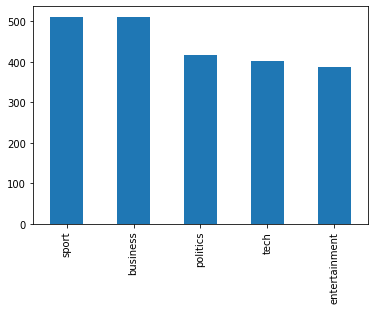

In [ ]:
df['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string as list
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
#     text = re.sub(r'\W+', '', text)
    text = [word for word in text.split() if word not in STOPWORDS] # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,text,label
0,Apple attacked over sources row\n\nCivil liber...,tech
1,Microsoft gets the blogging bug\n\nSoftware gi...,tech
2,Millions buy MP3 players in US\n\nOne in 10 ad...,tech
3,Cyber criminals step up the pace\n\nSo-called ...,tech
4,'No re-draft' for EU patent law\n\nA proposed ...,tech


In [ ]:
df['text'] = df['text'].apply(clean_text)
#df['text'] = df['text'].str.replace('\d+', '')
df.head()

,text,label
0,"[apple, attacked, sources, rowcivil, liberties...",tech
1,"[microsoft, gets, blogging, bugsoftware, giant...",tech
2,"[millions, buy, mp3, players, usone, 10, adult...",tech
3,"[cyber, criminals, step, pacesocalled, phishin...",tech
4,"[redraft, eu, patent, lawa, proposed, european...",tech


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tags={'sport':1,'tech':2,'politics':3,'entertainment':4,'business':5}
documents = [TaggedDocument(row[0], [tags[row[1]]]) for index, row in df.iterrows()]
print(documents[0])

TaggedDocument(['apple', 'attacked', 'sources', 'rowcivil', 'liberties', 'group', 'electronic', 'frontier', 'foundation', 'eff', 'joined', 'legal', 'fight', 'three', 'us', 'online', 'journalists', 'appleapple', 'wants', 'reporters', 'reveal', '20', 'sources', 'used', 'stories', 'leaked', 'information', 'forthcoming', 'products', 'including', 'mac', 'mini', 'eff', 'representing', 'reporters', 'asked', 'californias', 'superior', 'court', 'stop', 'apple', 'pursuing', 'sources', 'argues', 'journalists', 'protected', 'american', 'constitution', 'eff', 'says', 'case', 'threatens', 'basic', 'freedoms', 'pressapple', 'particularly', 'keen', 'find', 'source', 'information', 'unreleased', 'product', 'codenamed', 'asteroid', 'asked', 'journalists', 'email', 'providers', 'hand', 'communications', 'relevant', 'rather', 'confronting', 'issue', 'reporters', 'privilege', 'headon', 'apple', 'going', 'journalists', 'isps', 'emails', 'said', 'eff', 'lawyer', 'kurt', 'opsahl', 'undermines', 'fundamental',

In [ ]:
from sklearn import utils

documents=utils.shuffle(documents)
train_documents=documents[0:int(len(documents)*8/10)]
test_documents=documents[int(len(documents)*8/10):]
print(train_documents[:3],test_documents[:3])

[TaggedDocument(words=['qpr', 'keeper', 'day', 'heads', 'prestonqueens', 'park', 'rangers', 'keeper', 'chris', 'day', 'set', 'join', 'preston', 'months', 'loanday', 'displaced', 'arrival', 'simon', 'royce', 'second', 'month', 'loan', 'charlton', 'qpr', 'also', 'signed', 'italian', 'generoso', 'rossi', 'rs', 'manager', 'ian', 'holloway', 'said', 'might', 'say', 'risk', 'cant', 'recalled', 'month', 'simon', 'royce', 'recalled', 'charlton', 'irons', 'fire', 'yes', 'couple', 'others', 'need', 'themdays', 'rangers', 'contract', 'expires', 'summer', 'meanwhile', 'holloway', 'hoping', 'complete', 'signing', 'middlesbrough', 'defender', 'andy', 'davies', 'either', 'permanently', 'loan', 'saturdays', 'match', 'ipswich', 'davies', 'impressed', 'recent', 'loan', 'spell', 'loftus', 'road', 'holloway', 'also', 'chasing', 'bristol', 'city', 'midfielder', 'tom', 'doherty'], tags=[1]), TaggedDocument(words=['oconnell', 'rejects', 'lions', 'rumoursireland', 'munster', 'lock', 'paul', 'oconnell', 'dismi

In [ ]:
from tqdm import tqdm
import multiprocessing

cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)
model_dbow.build_vocab([x for x in tqdm(train_documents)])
train_documents  = utils.shuffle(train_documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words ,5)) for doc in sents])
    return targets, feature_vectors
model_dbow.save('./encodeModel.d2v')

100%|██████████| 1780/1780 [00:00<00:00, 613262.78it/s]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

In [ ]:
print(len(X_train[99]))
print(len(train_documents))

300
1780


In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[94  1  1  0  0]
 [ 1 87  1  0  0]
 [ 1  2 76  0  3]
 [ 0  2  1 73  0]
 [ 0  5  1  0 96]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        96
           2       0.90      0.98      0.94        89
           3       0.95      0.93      0.94        82
           4       1.00      0.96      0.98        76
           5       0.97      0.94      0.96       102

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

0.9573033707865168


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
    knn_scores.append(score.mean())
print(max(knn_scores))

0.997191011235955


Text(0.5, 1.0, 'K Neighbors Classifier cross validation scores for different K values')

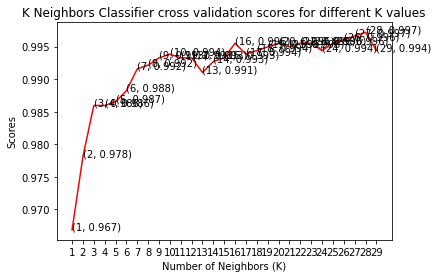

In [ ]:
import matplotlib.pyplot as plt
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1],3)))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier cross validation scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 28)
score=cross_val_score(knn_classifier,X_train,y_train,cv=10)
score.mean()

0.997191011235955

In [ ]:
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 95   0   1   0   0]
 [  1  73   2   1  12]
 [  2   0  74   0   6]
 [  2   0   3  68   3]
 [  0   0   0   1 101]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97        96
           2       1.00      0.82      0.90        89
           3       0.93      0.90      0.91        82
           4       0.97      0.89      0.93        76
           5       0.83      0.99      0.90       102

    accuracy                           0.92       445
   macro avg       0.93      0.92      0.92       445
weighted avg       0.93      0.92      0.92       445

0.9235955056179775


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTclassifier.fit(X_train, y_train)
y_pred= DTclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[69 10  8  6  3]
 [ 6 44 15 12 12]
 [ 5 10 46 12  9]
 [ 3 15 12 37  9]
 [ 8 14 10  9 61]]
              precision    recall  f1-score   support

           1       0.76      0.72      0.74        96
           2       0.47      0.49      0.48        89
           3       0.51      0.56      0.53        82
           4       0.49      0.49      0.49        76
           5       0.65      0.60      0.62       102

    accuracy                           0.58       445
   macro avg       0.57      0.57      0.57       445
weighted avg       0.58      0.58      0.58       445

0.5775280898876405


In [ ]:
from sklearn.svm import SVC

SVMclassifier = SVC(kernel='linear', random_state=0)
SVMclassifier.fit(X_train, y_train)
y_pred= SVMclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[94  2  0  0  0]
 [ 0 85  3  0  1]
 [ 0  2 78  0  2]
 [ 0  4  3 69  0]
 [ 0  4  1  1 96]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        96
           2       0.88      0.96      0.91        89
           3       0.92      0.95      0.93        82
           4       0.99      0.91      0.95        76
           5       0.97      0.94      0.96       102

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445

0.9483146067415731


In [ ]:
from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
y_pred= NBclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[87  7  1  0  1]
 [ 0 86  2  0  1]
 [ 0  1 79  0  2]
 [ 0  7  6 63  0]
 [ 0  5  1  0 96]]
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        96
           2       0.81      0.97      0.88        89
           3       0.89      0.96      0.92        82
           4       1.00      0.83      0.91        76
           5       0.96      0.94      0.95       102

    accuracy                           0.92       445
   macro avg       0.93      0.92      0.92       445
weighted avg       0.93      0.92      0.92       445

0.9235955056179775


In [ ]:
print((y_train[0]))

3


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(5)
km.fit(X_train)

colors = np.array(['red','blue','green','yellow','black'])
#plt.subplot(1,3,1)
plt.scatter(X_train,y_train,c=colors[y_train])
plt.plot()
plt.subplot(1,3,2)
plt.scatter(X_train,y_train,c=colors[km.labels_])
plt.plot()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: ignored

In [ ]:
inertia = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    inertia.append(kmeanModel.inertia_)

In [ ]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from joblib import dump, load
dump(logreg, 'logreg.joblib')

['logreg.joblib']

In [ ]:
#encode_model = Doc2Vec.load('encodeModel.d2v')
#clf = load('logreg.joblib')

NameError: ignored

In [ ]:
import PyPDF2
import textract

def predict_text(text):
    encode_model = Doc2Vec.load('encodeModel.d2v')
    clf = load('logreg.joblib')

    clean_text_list = clean_text(text)
    feature_vector = encode_model.infer_vector(clean_text_list ,5).reshape(1, -1)
    pred = clf.predict(feature_vector)
    return pred

def predict_from_pdf(file):
    pdfFileObj = open(file,'rb')
    Reader = PyPDF2.PdfReader(pdfFileObj)
    num_pages = len(Reader.pages)
    count = 0
    text = ""
    while count < num_pages:
        pageObj = Reader.pages[count]
        count +=1
        text += pageObj.extract_text()
    if text != "":
        text = text
    else:
        text = textract.process(file, method='tesseract', language='eng')
    return predict_text(str(text, 'UTF-8'))

def predict(sample):
    tags={1:'sport',2:'tech',3:'politics',4:'entertainment',5:'business'}
    if sample[-4:] == '.pdf':
        return tags[predict_from_pdf(sample)[0]]
    else:
        return tags[predict_text(sample)[0]]

In [ ]:
predict("The latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily.")

'tech'

In [ ]:
predict("/content/Scan.pdf")

'tech'

In [ ]:
predict("Creed III triples down on Michael B. Jordan, Daisy Jones & the Six plays the hits, and a starry cast blows things up in Guy Ritchie's Operation Fortune: Ruse de Guerre.")

'entertainment'

In [ ]:
!pip install gradio

In [ ]:
  import gradio as gr

with gr.Blocks() as demo:
    input = gr.Textbox(label="Sample",placeholder="Enter data in document or path of pdf document",lines=2)
    output = gr.Textbox(label="Category")
    greet_btn = gr.Button("Submit")
    greet_btn.click(fn=predict, inputs=input, outputs=output)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>